In [1]:
import numpy as np
import xarray as xr
# import plotly.express as px
from scipy import integrate
import matplotlib.pyplot as plt

In [2]:
R = 6.3781e6 # altitude, meters
h = 525e3 # altitude, meters
beta_star = np.arcsin(R/(R+h)) # beta angle, radians
tau = 90*60 # orbital period, seconds

r = 0.2111 # Cubesat radius in meters
boltz = 5.67*1e-8 # W/m^2/K^4
A_ir = np.pi*r**2
A_sol = 4*np.pi*r**2

T_init = 293.15 # starting temp, Kelvin

sc_absorb = .96
sc_emis = .9
sc_mass = 4 # kg
spec_heat = 897 # J/(kg*K)

q_sol = {"hot":1414,
        "cold": 1322} # W/m^2
Q_gen = 15


In [3]:
beta = np.linspace(0, beta_star, 100) # radians

f_E = np.arccos(np.sqrt(h**2+2*R*h)/((R+h)*np.cos(beta)))/np.pi
albedo = np.piecewise(beta,[beta < np.radians(30), beta >= np.radians(30)], [0.14, 0.19])
q_ir = np.piecewise(beta,[beta < np.radians(30), beta >= np.radians(30)], [228, 218]) # W/m^2


time = np.arange(0, tau, 100)


/var/folders/fc/b2n8k5vx0fd5pss09qxrjkd80000gn/T/ipykernel_78571/3354245748.py:3: RuntimeWarning: invalid value encountered in arccos
  f_E = np.arccos(np.sqrt(h**2+2*R*h)/((R+h)*np.cos(beta)))/np.pi


In [4]:
# px.line(y=[f_E, albedo, q_ir], x=beta)

In [5]:
beta_idx = 0

def qdot(time, Ts):

    # eclipse function
    if (time % tau) / tau >= f_E[beta_idx]:
        sol_rad = 1
    else:
        sol_rad =  0

    Q1 = q_ir[beta_idx]*A_ir
    Q2 = (1+sc_absorb)*q_sol["hot"]*A_sol*sol_rad*albedo[beta_idx]
    Q3 = Q_gen 
    Q4 = A_sol*boltz*sc_emis*Ts**4

    Q_dot = Q1 + Q2 + Q3 - Q4

    dTdt = Q_dot/(spec_heat*sc_mass)

    return dTdt

In [6]:
Ts = np.array([T_init,])
t = np.linspace(0, tau*8, 10000)

sol = integrate.solve_ivp(qdot, (0, tau*8), Ts, t_eval=t, method='LSODA')

In [7]:
# px.line(x = t/60, y = sol.y[0])

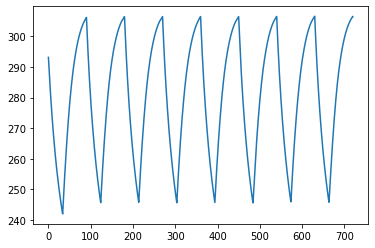

In [8]:
plt.plot(t/60, sol.y[0])